In [10]:
import mne
import matplotlib.pyplot as plt
file = "dataset/Balakrishna.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from C:\Users\abhil\Desktop\Parthasarathy paper\dataset\Balakrishna.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [11]:
ecgl = raw_data[27]
ecgr = raw_data[28]
sig = ecgl - ecgr


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


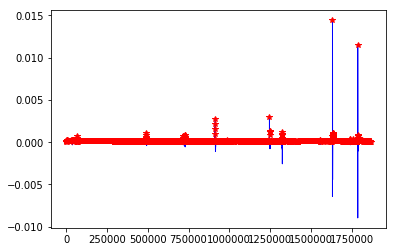

In [12]:
# import heartpy as hp
import numpy as np
from scipy.signal import butter, freqs, filtfilt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

fs = 256
n = len(sig)
# n = 1000
fc = 4
duration_sec = n / fs
duration_min = duration_sec / 60

b, a = butter(6, fc/(fs/2), 'low', analog=False)
# w, h = freqs(b, a)

y = filtfilt(b, a, sig[:])

peaks, _ = find_peaks(y, distance = 150, height=0)
plt.plot(y, 'b-', linewidth=1)

plt.plot(peaks, y[peaks], "*", color="red")
plt.show()

In [16]:
len(peaks)

8009

# BPM Average

In [15]:
# print(len(peaks))
beat_count = len(peaks)
fs = 256
n = len(sig)
duration_sec = n/fs
duration_min = duration_sec/60
bpm_avg = beat_count/duration_min
print(bpm_avg)
print(duration_min/60)

65.93578485181119
2.0244444444444443


In [14]:
duration_min

121.46666666666667

# Peak Interval Average

Peak Interval average:  -8.548247427720376e-08


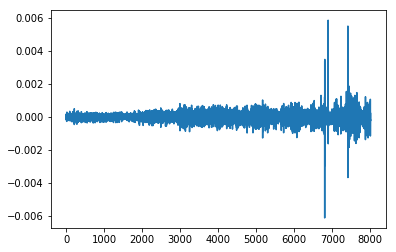

In [53]:
inter_peak_interval = []
inter_peak_interval_index = []

for i in range(0, len(y[peaks])-1):
        inter_peak_interval.append(y[peaks][i+1] - y[peaks][i])
        inter_peak_interval_index.append(i)
    
ipi_mean = np.array(inter_peak_interval).mean()
# plt.plot(y, 'b-', linewidth=1)
plt.plot(inter_peak_interval_index, inter_peak_interval)

# print(peaks)
print('Peak Interval average: ',ipi_mean)

In [42]:
inter_peak_time = []
for i in range(0, len(y[peaks])-1):
    inter_peak_time.append(((peaks[i+1] - peaks[i]))/60)
    
ipt_mean = np.array(inter_peak_time).mean()
ipt_max = np.array(peak_time).max()
ipt_min = np.array(peak_time).min()
# print(inter_peak_time)

# print(peaks)
print('Peak Interval average: ',ipt_mean)
print('Peak Interval Max: ',ipt_max)
print('Peak Interval Min: ',ipt_min)

Peak Interval average:  3.8828629703629702
Peak Interval Max:  121.46399739583333
Peak Interval Min:  0.0031901041666666666


# Average Peak Time

In [41]:
peak_time = []
for i in range(0, len(peaks)):
    peak_time.append((peaks[i]/256)/60)
    

pt_mean = np.array(peak_time).mean()
print( pt_mean)

60.25943595031111


# Max Min b/w section

Max 0.0001988586887155518
Min 0.00013491009071390361
0
8009
0.0001988586887155518
0.0001988586887155518


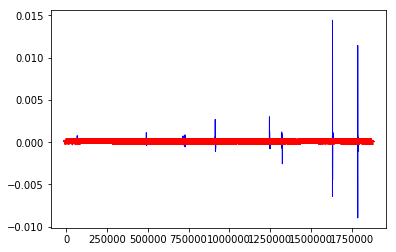

In [113]:
index = []
for i in range(len(peaks)):
    if peaks[i]>= 10000 and peaks[i]<=30000:
        index.append(i)
# print(index)

peak_copy = y[peaks].copy()

begin = index[0]
end = index[-1]

print('Max',y[peaks][begin:end+1].max())
print('Min',y[peaks][begin:end+1].min())

max = y[peaks][begin:end+1].max()
min = y[peaks][begin:end+1].min()
outliers = []
outliers_index = []
for i in range(len(y[peaks])):
#     print(i)
    if y[peaks][i] > max :
        outliers.append(y[peaks])
        outliers_index.append(i)
        peak_copy[i] = max
        
        
print(len(outliers))
# print(outliers)
print(len(peaks))
print(peak_copy.max())

y[peaks] = peak_copy
print(y[peaks].max())
plt.plot(y, 'b-', linewidth=1)

plt.plot(peaks, peak_copy, "*", color="red")

# Average Peak Value

In [115]:
peak_mean= np.array(y[peaks]).mean()
print(np.array(y[peaks]).mean())

0.00011798136898355166


# MULTIFILE

Processing.. ./dataset\AJUGEORGE.edf 1 / 25
Extracting EDF parameters from C:\Users\abhil\Desktop\Parthasarathy paper\dataset\AJUGEORGE.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


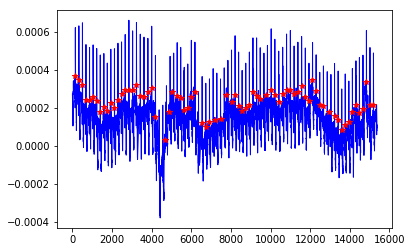

76.0
[0.578125, 1.2734375, 1.97265625, 2.66796875, 3.37890625, 4.078125, 4.77734375, 5.484375, 6.1953125, 6.87890625, 7.5703125, 8.28515625, 8.98046875, 9.6875, 10.40234375, 11.12890625, 11.875, 12.62109375, 13.375, 14.109375, 14.875, 15.625, 16.36328125, 18.1875, 18.9765625, 19.66015625, 20.65234375, 21.34765625, 22.0390625, 22.7421875, 23.37890625, 24.140625, 25.55078125, 26.30078125, 27.015625, 28.1171875, 29.19140625, 30.33984375, 31.3671875, 32.0625, 32.76171875, 33.4609375, 34.16796875, 34.88671875, 35.58984375, 36.3046875, 37.0234375, 38.140625, 39.18359375, 39.8984375, 40.67578125, 41.4609375, 42.21875, 42.9609375, 43.7265625, 44.4375, 45.1875, 45.90234375, 46.62890625, 47.32421875, 48.03125, 48.74609375, 49.4765625, 50.62109375, 51.6640625, 52.37890625, 53.06640625, 53.77734375, 54.48828125, 55.19921875, 55.89453125, 56.578125, 57.27734375, 57.94921875, 58.6484375, 59.34375]
Time:  0.016666666666666666 
Length:  15360


In [68]:
import mne
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
# import heartpy as hp
from scipy.signal import butter, freqs, filtfilt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

onlyfiles = [f for f in listdir("./dataset") if isfile(join("./dataset", f))]
df = pd.DataFrame([])
def find_time(sig):
    time = ((sig/256)/60)/60
    print("Time: ", time , "\nLength: ",sig)
    return ((sig/256)/60)/60


def channel_id(channel, val):   
    j =0
    for i in channel:
        if(i == val):
            return j
        
        j+=1
        
current = 1
total = len(onlyfiles)
for file in onlyfiles:
    filename = file
    file = join("./dataset", file)
    print("Processing..", file, current,"/",total)
    data = mne.io.read_raw_edf(file)
    info = data.info
    channels = data.ch_names
    raw_data = data.get_data()
    
    del data
    
    # you can get the metadata included in the file and a list of all channels:
    
    ecgl = raw_data[channel_id(channels,'ECGL')]
    ecgr = raw_data[channel_id(channels,'ECGR')]
    del raw_data
    
    sig = ecgl[:15360] -ecgr[:15360]
    del ecgl
    del ecgr
#   print("Signal Loaded..")

#     fs = 256
#     n = len(sig)
#     # n = 1000
#     fc = 4
#     duration_sec = n / fs
#     duration_min = duration_sec / 60

#     b, a = butter(6, fc/(fs/2), 'low', analog=False)
#     # w, h = freqs(b, a)

#     y = filtfilt(b, a, sig[:600])

    b, a = butter(6, fc/(fs/2), 'low', analog=False)

    # Filtering the signal
    y = filtfilt(b, a, sig[:])

#     peaks, _ = find_peaks(sig, distance = 150, height=0)
#     peaks_num = (len(peaks))                             # Contains the total no. of peaks
#     plt.plot(sig, 'b-', linewidth = 1)
#     plt.plot(peaks, y[peaks], "*", color="red")          # Plotting the peak points
#     # fig1 = plt.gfc()
#     plt.show()   
    peaks, _ = find_peaks(y, distance = 150, height=0)
    peaks_num = (len(peaks))                             # Contains the total no. of peaks
    plt.plot(sig, 'b-', linewidth = 1)
    plt.plot(peaks, y[peaks], "*", color="red")          # Plotting the peak points
    # fig1 = plt.gfc()
    plt.show()   
    
#     fig1.savefig(file.split(".")[0]+".png", dpi= 100)
    beat_count = len(peaks)
    fs = 256
    n = len(sig)
    duration_sec = n/fs
    duration_min = duration_sec/60
    bpm_avg = beat_count/duration_min
    print(bpm_avg)
    
    
    peak_time = []
    for i in range(0, len(peaks)):
        peak_time.append(peaks[i]/256)
    pt_mean = np.array(peak_time).mean()
    
    inter_peak_time = []
    rmsd_sum = 0
    for i in range(0, len(y[peaks])-1):
        inter_peak_time.append((peaks[i+1]/256)*1000 - (peaks[i]/256)*1000)
        rmsd_sum += pow((peaks[i+1]/256)*1000 - (peaks[i]/256)*1000, 2)
        


    ipt_mean = np.array(inter_peak_time).mean()
    ipt_max = np.array(inter_peak_time).max()
    ipt_min = np.array(inter_peak_time).min()    
    
    sdnn = np.array(inter_peak_time).std()
    rmsd = np.sqrt(rmsd_sum/len(inter_peak_time))
    
    print(peak_time)
    data = [[file.split(".")[0], find_time(len(sig)), bpm_avg, round(sdnn, 3), round(rmsd,3),round(ipt_mean,3), round(ipt_max,3), round(ipt_min,3), pt_mean]]
    current+=1
    df1 = pd.DataFrame(data,columns=['File Name','Duration','BPM','SDNN (ms)','RMSD (ms)','Inter Peak Interval Avg (ms)','Inter Peak Time Interval Max(ms)','Inter Peak Time Interval Min(ms)','Peak Time Mean(sec)'])
    df = df.append(df1,  ignore_index = True)
    del sig
#     print(df)
#     if current == 5:
    break

# df.to_csv("Stats", encoding='utf-8', index=False)

In [67]:
df

,File Name,Duration,BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,,0.00434,80.64,22.508,715.198,714.844,765.625,683.594,7.628348


In [8]:
beat_count = 0
peaks = []
peaks_time = []
for k in range(1,10000):
    if (sig[k]>sig[k-1] and sig[k]<sig[k+1] and sig[k]>0):
        beat_count+=1
        peaks.append(sig[k])
        peaks_time.append(k)
        
print(beat_count)

2455


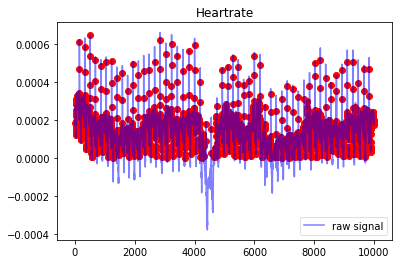

In [9]:

plt.title("Heartrate")
plt.plot(sig[:10000], alpha=0.5, color='blue', label="raw signal")
plt.scatter(peaks_time, peaks, color='red')
plt.legend(loc=4, framealpha=0.6)
plt.show()

In [55]:
fs = 100
# n = len(sig)
n= 30000
duration_sec = n/fs
duration_min = duration_sec/60
bpm_avg = beat_count/duration_min
print(bpm_avg)

412.8


# Peak Interval Average

In [16]:
import numpy as np
inter_peak_interval = []
for i in range(0, len(peaks)-1):
    inter_peak_interval.append(peaks[i+1] - peaks[i])
ipi_mean = np.array(inter_peak_interval).mean()
print('Peak Interval average: ',ipi_mean)

Peak Interval average:  1.3259918428952366e-07


# Average Peak Time

In [17]:
peak_time = []
for i in range(0, len(peaks)):
    peak_time.append(peaks[i]/256)

pt_mean = np.array(peak_time).mean()
print(np.array(peak_time).mean())


3.6038119125433666e-07


# Average Peak Value

In [26]:
peak_mean= np.array(peaks).mean()
print(np.array(peaks).mean())

9.225758496111018e-05


# MultiFile Script

In [7]:
import mne
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("./dataset") if isfile(join("./dataset", f))]
df = pd.DataFrame([])
def find_time(sig):
    time = ((sig/256)/60)/60
    print("Time: ", time , "\nLength: ",sig)
    return ((sig/256)/60)/60



current = 1
total = len(onlyfiles)
for file in onlyfiles:
    file = join("./dataset", file)
    print("Processing..", file, current,"/",total)
    data = mne.io.read_raw_edf(file)
    raw_data = data.get_data()
    # you can get the metadata included in the file and a list of all channels:
    info = data.info
    channels = data.ch_names
    ecgl = raw_data[27]
    ecgr = raw_data[28]
    sig = ecgl - ecgr
    
#     print("Signal Loaded..")
    beat_count = 0
    peaks = []
    peaks_time = []
    for k in range(1,len(sig)):
        if (sig[k]>sig[k-1] and sig[k]<sig[k+1] and sig[k]>0):
            beat_count+=1
            peaks.append(sig[k])
            peaks_time.append(k)

#     print("Beat Count:",beat_count)
    
    fs = 100
    n = len(sig)
#     n= 30000
    duration_sec = n/fs
    duration_min = duration_sec/60
    bpm_avg = beat_count/duration_min
#     print(bpm_avg)
    
    inter_peak_interval = []
    for i in range(0, len(peaks)-1):
        inter_peak_interval.append(peaks[i+1] - peaks[i])
    ipi_mean = np.array(inter_peak_interval).mean()
    
    
    peak_time = []
    for i in range(0, len(peaks)):
        peak_time.append(peaks[i]/256/60)

    pt_mean = np.array(peak_time).mean()
#     print(np.array(peak_time).mean())
    peak_mean= np.array(peaks).mean()
    
    
    data = [[file,len(sig),find_time(len(sig)),beat_count,bpm_avg,ipi_mean,pt_mean, peak_mean]]
    current+=1
    df1 = pd.DataFrame(data,columns=['File Name','Signal Length','Duration','Beat Count','BPM','Peak Interval Avg','Peak Time Avg','Peak Avg'])
    df = df.append(df1,  ignore_index = True)
    break
# df.to_csv("Stats", encoding='utf-8', index=False)

Processing.. ./dataset\AJUGEORGE.edf 1 / 25
Extracting EDF parameters from C:\Users\abhil\Desktop\Parthasarathy paper\dataset\AJUGEORGE.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Time:  2.703333333333333 
Length:  2491392


In [6]:
df

,File Name,Signal Length,Duration,Beat Count,BPM,Peak Interval Avg,Peak Time Avg,Peak Avg
0,./dataset\AJUGEORGE.edf,2491392,2.703333,439198,1057.717132,2.277111e-09,1.739289e-08,0.000267


In [3]:
import math 
import mne
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
# import heartpy as hp
from scipy.signal import butter, freqs, filtfilt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def find_time(sig):
    time = ((sig/256)/60)/60
    print("Time: ", time , "\nLength: ",sig)
    return ((sig/256)/60)


def time_data(min):
    return 256*60*min
def channel_id(channel, val):   
    j =0
    for i in channel:
        if(i == val):
            return j
        
        j+=1
        
filename = 'dataset/AJUGEORGE.edf'
data = mne.io.read_raw_edf(filename)
info = data.info
channels = data.ch_names
raw_data = data.get_data()

del data

ecgl = raw_data[channel_id(channels,'ECGL')]
ecgr = raw_data[channel_id(channels,'ECGR')]
del raw_data

sig = ecgl[:] -ecgr[:]
del ecgl
del ecgr

fs = 256
n = len(sig)
# n = 1000
fc = 4
b, a = butter(6, fc/(fs/2), 'low', analog=False)

y = filtfilt(b, a, sig[:])


peaks, _ = find_peaks(sig, distance = 150, height=0)
peaks_num = (len(peaks))                            
plt.plot(sig, 'b-', linewidth = 1)
plt.plot(peaks, y[peaks], "*", color="red")         
# fig1 = plt.gfc()
plt.show()   

beat_count = len(peaks)
fs = 256
n = len(sig)
duration_sec = n/fs
duration_min = duration_sec/60
bpm_avg = beat_count/duration_min
print(bpm_avg)


peak_time = []
for i in range(0, len(peaks)):
    peak_time.append(peaks[i]/256)
pt_mean = np.array(peak_time).mean()

inter_peak_time = []
rmsd_sum = 0
for i in range(0, len(y[peaks])-1):
    inter_peak_time.append((peaks[i+1]/256)*1000 - (peaks[i]/256)*1000)
    rmsd_sum += pow((peaks[i+1]/256)*1000 - (peaks[i]/256)*1000, 2)

ipt_mean = np.array(inter_peak_time).mean()
ipt_max = np.array(inter_peak_time).max()
ipt_min = np.array(inter_peak_time).min()    

sdnn = np.array(inter_peak_time).std()
rmsd = np.sqrt(rmsd_sum/(len(inter_peak_time)))

data = [[filename.split(".")[0], find_time(len(sig)), bpm_avg, round(sdnn), math.log(rmsd,2),round(ipt_mean), round(ipt_max), round(ipt_min), round(pt_mean)]]
df1 = pd.DataFrame(data,columns=['File Name','Duration(min)','BPM','SDNN (ms)','RMSD (ms)','Inter Peak Interval Avg (ms)','Inter Peak Time Interval Max(ms)','Inter Peak Time Interval Min(ms)','Peak Time Mean(sec)'])
# df = df.append(df1,  ignore_index = True)
del sig

C:\ProgramData\Anaconda3\lib\site-packages\numba\decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


Extracting EDF parameters from C:\Users\abhil\Desktop\Parthasarathy paper\dataset\AJUGEORGE.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<Figure size 640x480 with 1 Axes>

75.34525277435266
Time:  2.703333333333333 
Length:  2491392


In [21]:
df1

,File Name,Duration(min),BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/AJUGEORGE,5.0,81.8,32.0,9.519636,734.0,883.0,664.0,149.0


In [17]:
df1

,File Name,Duration,BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/AJUGEORGE,10.0,80.7,37.0,9.539159,743.0,934.0,652.0,297.0


In [24]:
df1

,File Name,Duration(min),BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/AJUGEORGE,30.0,78.766667,46.0,9.575539,762.0,1023.0,617.0,889.0


In [27]:
df1

,File Name,Duration(min),BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/AJUGEORGE,60.0,78.15,62.0,9.588715,768.0,2129.0,586.0,1789.0


In [29]:
df1

,File Name,Duration(min),BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/AJUGEORGE,120.0,78.491667,109.0,9.592457,764.0,3043.0,586.0,3593.0


In [31]:
df1

,File Name,Duration(min),BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/Balakrishna,120.0,67.016667,119.0,9.818582,895.0,6203.0,594.0,3591.0


In [33]:
df1

,File Name,Duration(min),BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/BHADRA,120.0,69.316667,107.0,9.768184,866.0,3492.0,586.0,3475.0


In [52]:
df1

,File Name,Duration(min),BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/AJUGEORGE,120.0,78.491667,109.0,9.592732,764.0,3043.0,586.0,3593.0


In [54]:
df1

,File Name,Duration(min),BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/AJUGEORGE,162.2,75.345253,234.0,9.69676,796.0,5961.0,586.0,4704.0


In [74]:
df1

,File Name,Duration(min),BPM,SDNN (ms),RMSD (ms),Inter Peak Interval Avg (ms),Inter Peak Time Interval Max(ms),Inter Peak Time Interval Min(ms),Peak Time Mean(sec)
0,dataset/AJUGEORGE,162.2,75.345253,234.0,9.69676,796.0,5961.0,586.0,4704.0
